In [43]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [44]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import mysql.connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


In [66]:
try:
    conexion = mysql.connector.connect(
        host='localhost',
        user='root',
        password='D4705.mySQL',
        database='sprint4')

    cursor = conexion.cursor()
    print("✅ Conexión exitosa a la base de datos.")

    # Función para cargar tablas
    def cargar_tabla(nombre_tabla):
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        return pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

    # Cargar tablas
    df_company = cargar_tabla("company")
    df_user = cargar_tabla("user")
    df_credit_card = cargar_tabla("credit_card")
    df_card_status = cargar_tabla("card_status")
    df_product = cargar_tabla("product")
    df_transaction = cargar_tabla("transaction")
    df_transaction_product = cargar_tabla("transaction_product")

    cursor.close()
    conexion.close()

except mysql.connector.Error as err:
    print(f"❌ Error de conexión a la base de datos: {err}")


cursor.close()
conexion.close()

✅ Conexión exitosa a la base de datos.


In [67]:
cols_a_string = ["comp_id", "comp_name", "comp_country","comp_phone", "comp_email", "comp_website"]
df_company[cols_a_string] = df_company[cols_a_string].astype("string")

df_company.dtypes

comp_id         string[python]
comp_name       string[python]
comp_country    string[python]
comp_phone      string[python]
comp_email      string[python]
comp_website    string[python]
dtype: object

In [68]:
df_user["user_birth_date"] = pd.to_datetime(df_user["user_birth_date"], errors="coerce")

cols_a_string = ["user_name", "user_surname", "user_phone", "user_email","user_country", "user_city", "user_postal_code", "user_address"]
df_user[cols_a_string] = df_user[cols_a_string].astype("string")

df_user.dtypes

user_id                      int64
user_name           string[python]
user_surname        string[python]
user_phone          string[python]
user_email          string[python]
user_birth_date     datetime64[ns]
user_country        string[python]
user_city           string[python]
user_postal_code    string[python]
user_address        string[python]
dtype: object

In [ ]:
df_credit_card["card_expiring_date"] = pd.to_datetime(df_credit_card["card_expiring_date"], errors="coerce")

cols_a_string = ["card_id", "card_iban", "card_pan","card_pin", "card_cvv", "card_track1", "card_track2"]
df_credit_card[cols_a_string] = df_credit_card[cols_a_string].astype("string")

df_credit_card.dtypes

card_id               string[python]
card_iban             string[python]
card_pan              string[python]
card_pin              string[python]
card_cvv              string[python]
card_track1           string[python]
card_track2           string[python]
card_expiring_date    datetime64[ns]
dtype: object

In [69]:
df_card_status["status"] = df_card_status["status"].astype("boolean")
df_card_status["card_id"] = df_card_status["card_id"].astype("string")

df_card_status.dtypes

card_id    string[python]
status            boolean
dtype: object

In [70]:
cols_a_string = ["prod_name", "prod_colour", "prod_warehouse_id"]
df_product[cols_a_string] = df_product[cols_a_string].astype("string")

df_product["prod_price"] = pd.to_numeric(df_product["prod_price"], errors="coerce").round(2)
df_product["prod_weight"] = pd.to_numeric(df_product["prod_weight"], errors="coerce").round(2)

df_product.dtypes

prod_id                       int64
prod_name            string[python]
prod_price                  float64
prod_colour          string[python]
prod_weight                 float64
prod_warehouse_id    string[python]
dtype: object

In [71]:
cols_id = ["tran_id", "card_id", "comp_id"]
df_transaction[cols_id] = df_transaction[cols_id].astype("string")

df_transaction["tran_timestamp"] = pd.to_datetime(df_transaction["tran_timestamp"], errors="coerce")
df_transaction["tran_amount"] = pd.to_numeric(df_transaction["tran_amount"], errors="coerce").round(2)
df_transaction["tran_decline"] = df_transaction["tran_decline"].astype("boolean")

df_transaction.dtypes

tran_id           string[python]
card_id           string[python]
comp_id           string[python]
user_id                    int64
tran_timestamp    datetime64[ns]
tran_amount              float64
tran_decline             boolean
tran_lat                 float64
tran_longitude           float64
dtype: object

In [72]:
df_transaction_product["tran_id"] = df_transaction_product["tran_id"].astype("string")

df_transaction_product.dtypes

tran_id    string[python]
prod_id             int64
dtype: object

In [73]:
color_columna = "#1b435f"     
color_borde = "#0f2a3b" 


- Ejercicio 1
Una variable numérica.

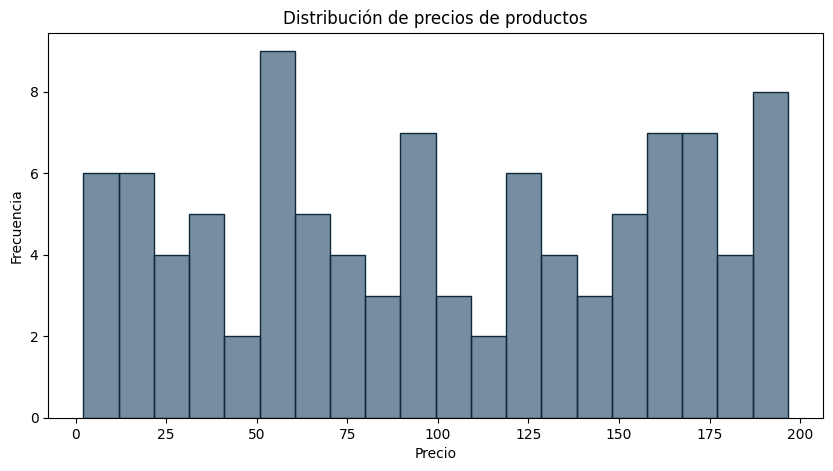

In [75]:

plt.figure(figsize=(10, 5))

sns.histplot(
    df_product["prod_price"],
    bins=20,
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.6)

plt.title("Distribución de precios de productos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

- Ejercicio 2
Dos variables numéricas.

- Ejercicio 3
Una variable categórica.


- Ejercicio 4
Una variable categórica y una numérica.

- Ejercicio 5
Dos variables categóricas.


- Ejercicio 6
Tres variables.

- Ejercicio 7
Graficar un Pairplot.


Nivel 2
Ejercicio 1
Correlación de todas las variables numéricas.


Ejercicio 2
Implementa un jointplot.


Nivel 3
Ejercicio 1
Implementa un violinplot combinado con otro tipo de gráfico.

Ejercicio 2
Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.